## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # to ignore warnings 

## Load Data using pandas

In [4]:
df=pd.read_csv(r'/home/khan/Downloads/indian-liver-patient-records/indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# About this Dataset
Based on chemical compounds(bilrubin,albumin,protiens,alkaline phosphatase) present in human body and tests like SGOT , SGPT the outcome mentioned whether person is patient ie needs to be diagnosed or not.



# Dataset Column represents person is Liver Patient or not.(1-Yes ,2-No)

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


# Filling Missing Values

In [10]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [12]:
df['Albumin_and_Globulin_Ratio'].fillna(value=df['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

# Visualization and Analysis

Text(0.5, 1.0, 'Gender wise liver patient')

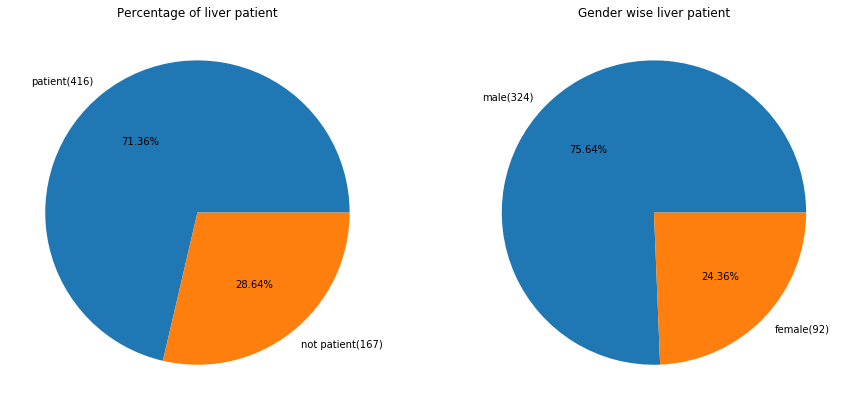

In [13]:
target_counts=df['Dataset'].value_counts().values
gender_counts=df['Gender'].value_counts().values

fig1, axes=plt.subplots(nrows=1, ncols=2,figsize=(15,10))


target_sizes=df.groupby('Dataset').size()
axes[0].pie(
    x=target_counts,
    labels=['patient({})'.format(target_sizes[1]),'not patient({})'.format(target_sizes[2])],
    autopct='%1.2f%%'
)
axes[0].set_title("Percentage of liver patient")

gender_sizes=df[df['Dataset']==1].groupby('Gender').size()
axes[1].pie(
    x=gender_counts, 
    labels=['male({})'.format(gender_sizes['Male']), 'female({})'.format(gender_sizes['Female'])], 
    autopct="%1.2f%%"
)
axes[1].set_title("Gender wise liver patient")